In [60]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [61]:
df = pd.read_excel('example.xlsx')
df.head()

,Name,Hours_of_lessons_per_week,average_test_score,Projects
0,Vasili,13,74,2
1,Elena,15,77,3
2,Marysia,20,89,2
3,Nastia,14,71,1
4,Serezha,10,65,4


In [62]:
X = df[['average_test_score', 'Hours_of_lessons_per_week']]
Y = df['Projects']

In [63]:
model = LinearRegression()

X = X.values # conversion of X  into array
model.fit(X, Y)

LinearRegression()

In [64]:
predictions = model.predict(X)
# y_pred and predictions on the same data 
y_pred = model.predict(X)

#Regression coefficients (Bo, B1, B2)
intercept = model.intercept_ #Bo
coefficients = model.coef_ #B1, B2

# R-squared Coefficient of determination
r2 = metrics.r2_score(Y, predictions)

# R-squared
n = len(Y)
p = X.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# SSE and SSR
sse = np.sum((Y - predictions)**2)
ssr = np.sum((y_pred - np.mean(Y)) ** 2)

print(f'\n1. Regression coefficients:')
print(f'   Intercept (Bo): {intercept:.4f}')
print(f'   Coefficient for X1 | average_test_score (B1): {coefficients[0]:.4f}')
print(f'   Coefficient for X2 | Hours_of_lessons_per_week (B2): {coefficients[1]:.4f}')

# Print R-squared, Adjusted R-squared, and SSE
print(f'R-squared: {r2:.4f}')
print(f'Adjusted R-squared: {adjusted_r2:.4f}')
print(f'Sum Squared Error (SSE): {sse:.4f}')


1. Regression coefficients:
   Intercept (Bo): -6.4575
   Coefficient for X1 | average_test_score (B1): 0.2680
   Coefficient for X2 | Hours_of_lessons_per_week (B2): -0.7843
R-squared: 0.4344
Adjusted R-squared: -0.1312
Sum Squared Error (SSE): 2.9412


In [65]:
# Print a table with predicted Y
result_df = pd.DataFrame({'Name':df['Name'],'No of average_test_score':df['average_test_score'], 'No of Hours_of_lessons_per_week': df['Hours_of_lessons_per_week'], 'Done Projects | Actual Y': Y, 'Y_predicted': predictions})
# Add SSE and SSR to the DataFrame
result_df['SSE'] = sse
result_df['SSR'] = ssr

print('\nTable with Predicted Y:')
print(result_df)


Table with Predicted Y:
      Name  No of average_test_score  No of Hours_of_lessons_per_week  \
0   Vasili                        74                               13   
1    Elena                        77                               15   
2  Marysia                        89                               20   
3   Nastia                        71                               14   
4  Serezha                        65                               10   

   Done Projects | Actual Y  Y_predicted       SSE       SSR  
0                         2     3.176471  2.941176  2.258824  
1                         3     2.411765  2.941176  2.258824  
2                         2     1.705882  2.941176  2.258824  
3                         1     1.588235  2.941176  2.258824  
4                         4     3.117647  2.941176  2.258824  


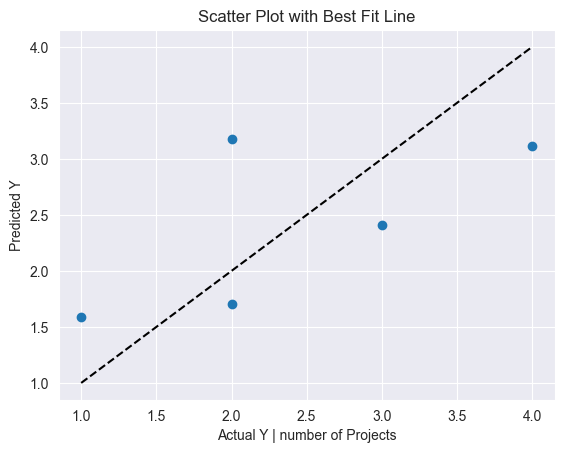

In [66]:
# Plot scatter plot with the best fit line
plt.scatter(Y, predictions)
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], '--k')  # Best fit line
plt.xlabel('Actual Y | number of Projects')
plt.ylabel('Predicted Y')
plt.title('Scatter Plot with Best Fit Line')
plt.show()

In [67]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.26797386 -0.78431373]
Intercept: -6.457516339869267


In [68]:
new_data = np.array([
    [4, 5],
    [2, 3],
])

predictions = model.predict(new_data)
print("Predictions:", predictions)

Predictions: [-9.30718954 -8.2745098 ]


In [69]:
y_pred = model.predict(X)

# Evaluate model accuracy
r2 = r2_score(Y, y_pred)
r2

0.43438914027149267

In [70]:
predictions = model.predict(X)
residuals = Y - predictions
residuals_df = pd.DataFrame({'Actual': Y, 'Predicted': predictions, 'Residuals': residuals})
residuals_df

,Actual,Predicted,Residuals
0,2,3.176471,-1.176471
1,3,2.411765,0.588235
2,2,1.705882,0.294118
3,1,1.588235,-0.588235
4,4,3.117647,0.882353


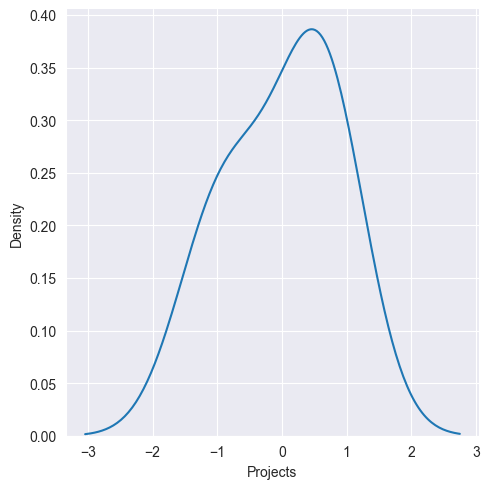

In [71]:
sns.displot(residuals,kind='kde')